<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/MagneticCircuit_NonIdealTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Ideal Transformer to Non-Ideal Transformer Equivalent Circuit</h1></b>

Dr. Bingsen Wang

4/28/2024
</center>

#Python Code
The Python code illustrates the equivalent circuit of a non-ideal tranformer.

<ipython-input-61-06b3ff400fa9>:345: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


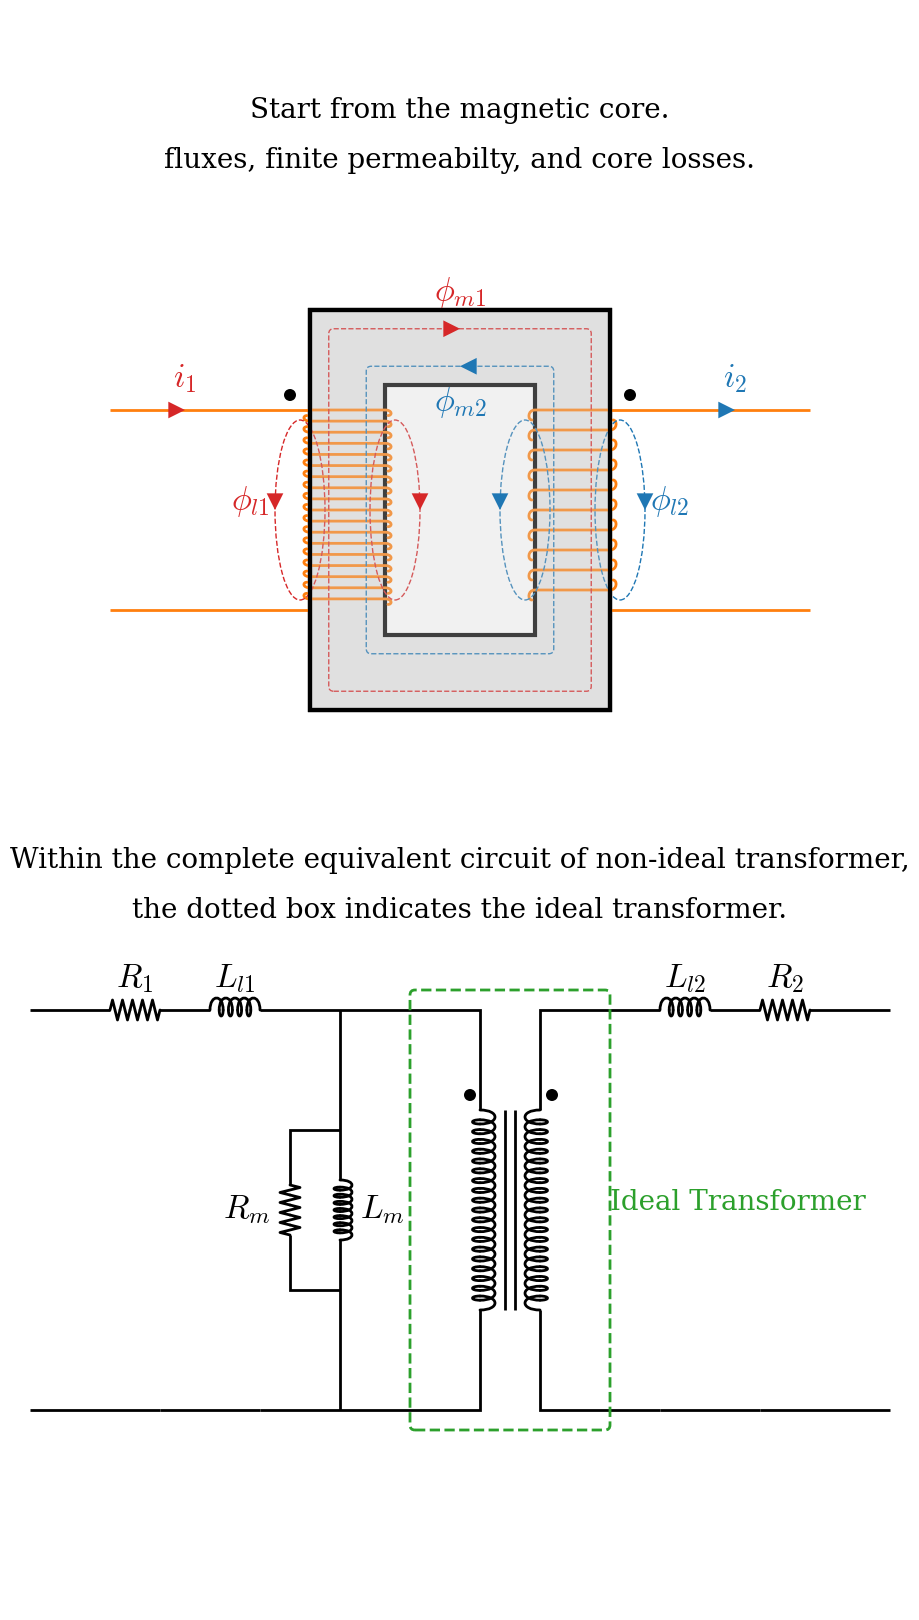

In [61]:
import matplotlib
from os import linesep
from math import ceil
import numpy as np
from numpy import linspace,cos,sin,pi,heaviside,array,sqrt,angle,exp,sign
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba#,TABLEAU_COLORS
from matplotlib.path import Path
from matplotlib.patches import PathPatch as pp
import matplotlib.patches as mp
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})


#draw resistor symbol
def drawResistor(ax,x0,y0,n,h,w,theta,lw,color):
  """ n: number of zig-zags; h: height; w: width; lw: line weight
  theta: orientation 0 for horizontal 90 for vertical"""
  w= w/n#width each zig-zag
  ps=[] # container of the zig-zags
  codes=[Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO]
  for k in range(n):
    p = Path([(x0 + k*w,y0),(x0 + (k+0.25)*w,y0+0.25*h),
              (x0+(0.75+k)*w,y0-0.25*h),(x0+(k+1)*w,y0)],codes)
    ps.append(mp.PathPatch(p))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  pc=PatchCollection(ps,ec=color,fc='none',lw=lw,transform=rot,capstyle='round')
  ax.add_collection(pc)
  return

#draw inductor symbol
def drawInductor(ax,x0,y0,n,h,w,theta,lw,color):
  """n: number of coils;  h: height or width; lw: line weight
  theta: orientation 0 for horizontal 90 for vertical """
  w= w/(0.7*n+0.3)#width of larger coil
  plg, psm = ([],[]) #the half coil with larger curvature
  codes=[Path.MOVETO,Path.CURVE4,Path.CURVE4,Path.CURVE4]
  verts=[(x0,y0),(x0,y0+0.4*h),(x0+w,y0+0.4*h),(x0+w,y0)]
  for k in range(n):
    if k==0:
      plg.append(mp.PathPatch(Path(verts,codes)))
    else:
      p = Path([(x0 + 0.7*k*w,y0),(x0 + 0.7*k*w,y0+0.4*h),
                (x0+(0.7*k+1)*w,y0+0.4*h),(x0+(0.7*k+1)*w,y0)], codes)
      plg.append(mp.PathPatch(p))
      p = Path([(x0 + 0.7*k*w,y0),(x0 + 0.7*k*w,y0-0.2*h),
                (x0+(0.7*k+0.3)*w,y0-0.2*h),(x0+(0.7*k+0.3)*w,y0)], codes)
      psm.append(mp.PathPatch(p))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  pc=PatchCollection(np.concatenate((plg,psm)),ec=color,fc='none',lw=lw,transform=rot,capstyle='round')
  ax.add_collection(pc)
  return

#draw capcitor symbol
def drawCapacitor(ax,x0,y0,h,theta,lw,color):
  """ h: height or width;   lw: line weight
  theta: orientation 0 for horizontal 90 for vertical """
  dx1,dx2,dy = (0.425*h, 0.575*h, 0.25*h)
  p = Path([(x0,y0),(x0+dx1,y0),(x0+dx1,y0+dy),(x0+dx1,y0-dy),
            (x0+dx2,y0+dy),(x0+dx2,y0-dy),(x0+dx2,y0),(x0+h,y0)],
           [Path.MOVETO,Path.LINETO, Path.MOVETO,Path.LINETO,
            Path.MOVETO, Path.LINETO,Path.MOVETO,Path.LINETO])
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  args = dict({'lw':lw,'capstyle':'round'})
  ax.add_patch(mp.PathPatch(p,transform=rot,fc='none',ec=color,**args))
  return

#single-turn coil
def drawCoilSingleTurn(ax,x0,y0,h,w,theta=0,start=True,dir='CLOCKWISE',lw=2,color='k'):
  """x0,y0: left corner coordinates; h: height or width; lw: line weight
  theta: 0 for horizontal """
  if dir=='CLOCKWISE':
    k=1
  else:
    k=-1
  codes=[Path.MOVETO,Path.LINETO,Path.CURVE4,Path.CURVE4,Path.CURVE4]
  codes1=[Path.MOVETO,Path.CURVE4,Path.CURVE4,Path.CURVE4,Path.LINETO,
          Path.CURVE4,Path.CURVE4,Path.CURVE4]
  verts=[(x0,y0),(x0+w,y0),(x0+1.1*w,y0),(x0+1.1*w,y0-.5*k*h),(x0+w*1.04,y0-.5*k*h)]
  verts1=[(x0-.04*w,y0+.5*k*h),(x0-.1*w,y0+.5*k*h),(x0-.1*w,y0),(x0,y0),
   (x0+w,y0),(x0+1.1*w,y0),(x0+1.1*w,y0-.5*k*h),(x0+w*1.04,y0-.5*k*h)]
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  if start:
    p=mp.PathPatch(Path(verts,codes),ec=color,fc='none',lw=lw,transform=rot,capstyle='round')
  else:
    p=mp.PathPatch(Path(verts1,codes1),ec=color,fc='none',lw=lw,transform=rot,capstyle='round')
  ax.add_patch(p)
  return

#draw coil-primary
def drawCoilPrimary(ax,x0,y0,n,h,w,theta=0,dir='CLOCKWISE',lw=2,color='k'):
  """n: number of coils;  h: height or width; lw: line weight
  theta: orientation 0 for horizontal 90 for vertical """
  hpc = h/n #height per coil
  if dir=='CLOCKWISE':
    drawCoilSingleTurn(ax,x0,y0,hpc,w,theta=theta,lw=lw,color=color) #starting turn
    for k in range(1,n):
      drawCoilSingleTurn(ax,x0,y0-k*hpc,hpc,w,theta=theta,start=False,lw=lw,color=color) #rest turns
  else:
    drawCoilSingleTurn(ax,x0,y0-h,hpc,w,theta=theta,dir='COUNTERCLOCKWISE',lw=lw,color=color) #starting turn
    for k in range(1,n):
      drawCoilSingleTurn(ax,x0,y0-h+k*hpc,hpc,w,theta=theta,dir='COUNTERCLOCKWISE',start=False,lw=lw,color=color) #rest turns
  return

#draw coil-secondary
def drawCoilSecondary(ax,x0,y0,n,h,w,theta=0,dir='CLOCKWISE',lw=2,color='k'):
  """n: number of coils;  h: height or width; lw: line weight
  theta: orientation 0 for horizontal 90 for vertical """
  hpc = h/n #height per coil
  if dir=='CLOCKWISE':
    drawCoilSingleTurn(ax,x0,y0-h,hpc,w,theta=theta,lw=lw,color=color) #starting turn
    for k in range(1,n):
      drawCoilSingleTurn(ax,x0,y0-h+k*hpc,hpc,w,theta=theta,start=False,lw=lw,color=color) #rest turns
  else:
    drawCoilSingleTurn(ax,x0,y0,hpc,w,theta=theta,lw=lw,dir='COUNTERCLOCKWISE',color=color) #starting turn
    for k in range(1,n):
      drawCoilSingleTurn(ax,x0,y0-k*hpc,hpc,w,theta=theta,start=False,dir='COUNTERCLOCKWISE',lw=lw,color=color) #rest turns
  return


#draw flux lines inside the magnetic core
def drawFluxLines(ax,x0,y0,n,hi,ho,wi,wo,lw,color):
  dw = .5*(wo-wi)/(n+1)
  dh = .5*(ho-hi)/(n+1)
  for k in range(ceil(n)*2+1):
    w = .5*(wo+wi) - dw*(ceil(n)-k)
    h = .5*(ho+hi) - dh*(ceil(n)-k)
    fll = mp.FancyBboxPatch((x0-.5*w,y0-.5*h), w, h, ls='--', lw=lw,
        boxstyle='Round, pad=0, rounding_size=0.05', ec=color,fc='none')
    ax.add_patch(fll)
  return

#draw ac voltage source symbol
def drawVoltSourceAc(ax,x0,y0,h,theta,lw,color):
  """ x0,y0: top or left end of the voltage source lead
  h: height or width; lw: line weight
  theta: orientation 0 for horizontal 90 for vertical"""
  ps=[]
  codes=[Path.MOVETO,Path.LINETO,Path.MOVETO,Path.LINETO]
  p = Path([(x0,y0),(x0+.2*h,y0),(x0+.8*h,y0),(x0+h,y0)],codes)
  ps.append(mp.PathPatch(p))
  ps.append(mp.Circle((x0+.5*h,y0),.3*h))
  ps.append(mp.Arc((x0+.4*h,y0),.2*h,.2*h,theta2=180))
  ps.append(mp.Arc((x0+.6*h,y0),.2*h,.2*h,theta1=180))
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  pc=PatchCollection(ps,ec=color,fc='none',lw=lw,transform=rot,capstyle='round')
  ax.add_collection(pc)
  return

#draw the +/- voltage polarity with variable distance/color
def drawVoltSign(ax,x0,y0,h,theta,lw,color):
  """
  x0,y0: center between "+" and "-"
  h: height or width
  theta: orientation 0 for horizontal 90 for vertical
  lw: line weight
  """
  p = Path([(x0-0.5*h,y0-0.1*h),(x0-0.5*h,y0+0.1*h),(x0-0.6*h,y0),(x0-0.4*h,y0),
            (x0+0.5*h, y0-0.08*h),(x0+0.5*h, y0+0.08*h)],
           [Path.MOVETO,Path.LINETO,Path.MOVETO,Path.LINETO,
            Path.MOVETO,Path.LINETO])
  rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
  ax.add_patch(mp.PathPatch(p,ec=color,fc='none',lw=lw,transform=rot,capstyle='round'))
  return

# #draw non-animated parts of the circuitry
# def drawCircuitNa(ax,lw,clst,txlst):
#   drawVoltSign(ax,x0-3.75,y0, 1.2,-90,2,clst[0]) #v1 sign

#draw animated parts of the circuitry
def drawCircuitAnim(ax,step,lw):
  x0,y0,wo,ho,wi,hi = 4.5,11,3,4,1.5,2.5
  x1,y1 = 5,4
  codes=[Path.MOVETO,Path.LINETO]
  codes1=[Path.MOVETO,Path.LINETO,Path.LINETO]

  match step:
    case 0: #magnetic core, outer rectangle
      ax.add_patch(mp.Rectangle((x0-.5*wo,y0-.5*ho), width=wo,height=ho,ec='k',
                          fc=to_rgba('lightgray',.3),lw=3))
      txt11.set_text('Start from the magnetic core.')

    case 1: #magnetic core, inner rectangle
      ax.add_patch(mp.Rectangle((x0-.5*wi,y0-.5*hi), width=wi,height=hi,ec='k',
                          fc='w',lw=3))

    case 2: #core in equivalent circuit
      ax.add_patch(pp(Path([(x1-.05,y1+1),(x1-.05,y1-1)],codes),ec='k',lw=lw))
      ax.add_patch(pp(Path([(x1+.05,y1+1),(x1+.05,y1-1)],codes),ec='k',lw=lw))
      txt21.set_text('Two straight lines represent the magnetic core in circuit.')

    case 3: #primary winding
      drawCoilPrimary(ax,x0-.5*wo,y0+1,18,2,.5*(wo-wi),lw=lw,color='tab:orange')
      p = Path([(x0-.5*wo-2,y0+1),(x0-.5*wo,y0+1),
                (x0-.5*wo-2,y0-1),(x0-.5*wo,y0-1)], codes+codes)
      ax.add_patch(pp(p,ec='tab:orange',fc='none',lw=lw))
      txt11.set_text('Add primary winding on the left side.')

    case 4: #parimary winding in equivalent circuit
      drawInductor(ax,x1-.3,y1+1,20,.5,2,-90,lw,'k')
      p=Path([(x1-.3,y1+1),(x1-.3,y1+2),(x1-2.5,y1+2),
              (x1-.3,y1-1),(x1-.3,y1-2),(x1-2.5,y1-2)],codes1+codes1)
      ax.add_patch(pp(p, ec='k',fc='none',lw=lw))
      txt21.set_text('A coil on the left represents the primary winding.')

    case 5: #secondary winding
      drawCoilSecondary(ax,x0+.5*wo,y0+1,10,2,.5*(wo-wi),theta=180,
                        dir='COUNTERCLOCKWISE',lw=lw,color='tab:orange')
      p = Path([(x0+.5*wo+2,y0+1),(x0+.5*wo,y0+1),
       (x0+.5*wo+2,y0-1),(x0+.5*wo,y0-1)], codes+codes)
      ax.add_patch(pp(p,ec='tab:orange',fc='none',lw=lw))
      txt11.set_text('Add secondary winding on the right side.')

    case 6: #secondary winding in equivalent circuit
      drawInductor(ax,x1+.3,y1-1,20,.5,2,90,lw,'k')
      p=Path([(x1+.3,y1+1),(x1+.3,y1+2),(x1+1.5,y1+2),
              (x1+.3,y1-1),(x1+.3,y1-2),(x1+1.5,y1-2)],codes1+codes1)
      ax.add_patch(pp(p, ec='k',fc='none',lw=lw))
      txt21.set_text('A coil on the right represents the secondary winding.')

    case 7: #annotate dotted terminals in magnetic circuit
      ax.add_patch(mp.Circle((x0-wo*.5-.2,y0+1.15),0.06,fc='k',ec='none'))
      ax.add_patch(mp.Circle((x0+wo*.5+.2,y0+1.15),0.06,fc='k',ec='none'))
      txt11.set_text('Two dots denote the winding direction such that')
      txt12.set_text('if currents flow into the dotted terminals, ')
      txt13.set_text('their resultant fluxes would add up.')

    case 8: #annotate dotted terminals in equivalent circuit
      ax.add_patch(mp.Circle((x1-.4,y1+1.15),0.06,fc='k',ec='none'))
      ax.add_patch(mp.Circle((x1+.42,y1+1.15),0.06,fc='k',ec='none'))
      txt21.set_text('Two dots in circuit also indicate the winding direction.')

    case 9: #primary leakage flux
      ap = dict(fc='tab:red',ec='none',shrink=.5)
      ax.annotate("", xy=(x0-2.5, y0+1), xytext=(x0-3, y0+1), arrowprops=ap)
      ax.text(x0-2.75,y0+1.15,"$i_1$",size=24,ha='center',va='bottom',color='tab:red')
      drawFluxLines(ax,x0,y0,0,.5*(hi+ho),ho,.5*(wi+wo),wo,1,'tab:red')
      ax.annotate("", xy=(x0+.25, y0+.375*ho+.125*hi),
                  xytext=(x0-.25, y0+.375*ho+.125*hi), arrowprops=ap)
      ax.text(x0,y0+2,r"$\phi_{m1}$",size=24,ha='center',va='bottom',color='tab:red')
      ax.add_patch(mp.Ellipse((x0-wo*.5-.1,y0),.5,1.8,ls='--',lw=1,fc='none',ec='tab:red'))
      ax.add_patch(mp.Ellipse((x0-wi*.5+.1,y0),.5,1.8,ls='--',lw=1,fc='none',ec='tab:red'))
      ax.annotate("", xy=(x0-wo*.5-.35, y0-.25),xytext=(x0-wo*.5-.35, y0+.25), arrowprops=ap)
      ax.annotate("", xy=(x0-wi*.5+.35, y0-.25),xytext=(x0-wi*.5+.35, y0+.25), arrowprops=ap)
      ax.text(x0-wo*.5-.4,y0,r"$\phi_{l1}$",size=24,ha='right',color='tab:red')
      txt11.set_text('When the current $i_1$ flows through the primary winding,')
      txt12.set_text(r'the leakage flux $\phi_{l1}$ and mutual flux $\phi_{m1}$ are established.')
      txt13.set_text('')

    case 10: #primary leakage inductance in equivalent circuit
      drawInductor(ax,x1-3,y1+2,5,.4,.5,0,lw,'k')
      ax.text(x1-2.75,y1+2.15,"$L_{l1}$",size=24,ha='center',va='bottom')
      ax.add_patch(pp(Path([(x1-3,y1+2),(x1-3.5,y1+2)],codes), ec='k',lw=lw))
      ax.add_patch(pp(Path([(x1-2.5,y1-2),(x1-3.5,y1-2)],codes), ec='k',lw=lw))
      txt21.set_text('The inductance $L_{l1}$ is used to model the leakage flux $\phi_{l1}$.')

    case 11: #secondary leakage flux
      ap = dict(fc='tab:blue',ec='none',shrink=.5)
      ax.annotate("", xy=(x0+3, y0+1), xytext=(x0+2.5, y0+1), arrowprops=ap)
      ax.text(x0+2.75,y0+1.15,"$i_2$",size=24,ha='center',va='bottom',color='tab:blue')
      drawFluxLines(ax,x0,y0,0,hi,.5*(hi+ho),wi,.5*(wi+wo),1,'tab:blue')
      ax.annotate("", xy=(x0-.25, y0+.375*hi+.125*ho),
                  xytext=(x0+.25, y0+.375*hi+.125*ho), arrowprops=ap)
      ax.text(x0,y0+hi*.5,r"$\phi_{m2}$",size=24,ha='center',va='top',color='tab:blue')
      ax.add_patch(mp.Ellipse((x0+wo*.5+.1,y0),.5,1.8,ls='--',lw=1,fc='none',ec='tab:blue'))
      ax.add_patch(mp.Ellipse((x0+wi*.5-.1,y0),.5,1.8,ls='--',lw=1,fc='none',ec='tab:blue'))
      ax.annotate("", xy=(x0+wo*.5+.35, y0-.25),xytext=(x0+wo*.5+.35, y0+.25), arrowprops=ap)
      ax.annotate("", xy=(x0+wi*.5-.35, y0-.25),xytext=(x0+wi*.5-.35, y0+.25), arrowprops=ap)
      ax.text(x0+wo*.5+.4,y0,r"$\phi_{l2}$",size=24,ha='left',color='tab:blue')
      txt11.set_text('When the current $i_2$ flows through the secondary winding,')
      txt12.set_text(r'the leakage flux $\phi_{l2}$ and mutual flux $\phi_{m2}$ are established.')

    case 13: #secondary leakage inductance in equivalent circuit
      drawInductor(ax,x1+1.5,y1+2,5,.4,.5,0,lw,'k')
      ax.text(x1+1.75,y1+2.15,"$L_{l2}$",size=24,ha='center',va='bottom')
      ax.add_patch(pp(Path([(x1+2,y1+2),(x1+2.5,y1+2)],codes), ec='k',lw=lw))
      ax.add_patch(pp(Path([(x1+1.5,y1-2),(x1+2.5,y1-2)],codes), ec='k',lw=lw))
      txt21.set_text('The inductance $L_{l2}$ is used to model the leakage flux $\phi_{l2}$.')

    case 14: #primary winding resistance in equivalent circuit
      drawResistor(ax,x1-4,y1+2,5,.4,.5,0,lw,'k')
      ax.text(x1-3.75,y1+2.15,"$R_1$",size=24,ha='center',va='bottom')
      ax.add_patch(pp(Path([(x1-4,y1+2),(x1-4.8,y1+2)],codes), ec='k',lw=lw))
      ax.add_patch(pp(Path([(x1-3.5, y1-2),(x1-4.8,y1-2)],codes), ec='k',lw=lw))
      txt11.set_text('In non-ideal transformer, each winding has non-zero resistance.')
      txt12.set_text('')
      txt21.set_text('The primary winding resistance is modeled by $R_1$.')

    case 15: #secondary winding resistance in equivalent circuit
      drawResistor(ax,x1+2.5,y1+2,5,.4,.5,0,lw,'k')
      ax.text(x1+2.75,y1+2.15,"$R_2$",size=24,ha='center',va='bottom')
      ax.add_patch(pp(Path([(x1+3,y1+2),  (x1+3.8,y1+2)],codes), ec='k',lw=lw))
      ax.add_patch(pp(Path([(x1+2.5,y1-2),(x1+3.8,y1-2)],codes), ec='k',lw=lw))
      txt21.set_text('The secondary winding resistance is modeled by $R_2$.')

    case 16: #magnetizing inductance in equivalent circuit
      drawInductor(ax,x1-1.7,y1+.3,8,.4,.6,-90,lw,'k')
      ax.add_patch(pp(Path([(x1-1.7,y1+.3),(x1-1.7,y1+2)],codes), ec='k',lw=lw))
      ax.add_patch(pp(Path([(x1-1.7,y1-.3),(x1-1.7,y1-2)],codes), ec='k',lw=lw))
      ax.text(x1-1.5,y1,"$L_m$",size=24,ha='left',va='center')
      txt11.set_text('Since the permeability of the magnetic core is finite,')
      txt12.set_text('A non-zero magnetizing current is needed to establish')
      txt13.set_text('the mutual flux, the sum of $\phi_{m1}$ and $\phi_{m2}$.')
      txt21.set_text('The magnetizing inductance $L_m$ is to model the mutual flux.')
      txt22.set_text('$L_m$ can be placed on the primary or the secondary side.')

    case 17: #core loss resistance in equivalent circuit
      drawResistor(ax,x1-2.2,y1+.25,5,.4,.5,-90,lw,'k')
      p=Path([(x1-2.2,y1+.25),(x1-2.2,y1+.8),(x1-1.7,y1+.8),
              (x1-2.2,y1-.25),(x1-2.2,y1-.8),(x1-1.7,y1-.8)],codes1+codes1)
      ax.add_patch(pp(p, ec='k',fc='none',lw=lw))
      ax.text(x1-2.4,y1,"$R_m$",size=24,ha='right',va='center')
      txt11.set_text('The magnetic core has hysteresis loss and eddy-current loss.')
      txt12.set_text('')
      txt13.set_text('')
      txt21.set_text('The resistance $R_m$ approximately models the core losses.')
      txt22.set_text('')

    case 18:
      txt11.set_text('In summary, a non-ideal tranformer has wining losses, leakage')
      txt12.set_text('fluxes, finite permeabilty, and core losses.')
      txt21.set_text('')

    case 19:
      ax.add_patch(mp.FancyBboxPatch((x1-1,y1-2.2), 2, 4.4, ls='--', lw=lw,
        boxstyle='Round, pad=0, rounding_size=0.05', ec='tab:green',fc='none'))
      txt11.set_text('In summary, a non-ideal tranformer has wining losses, leakage')
      txt12.set_text('fluxes, finite permeabilty, and core losses.')
      txt21.set_text('Within the complete equivalent circuit of non-ideal transformer,')
      txt22.set_text('the dotted box indicates the ideal transformer.')
      ax.text(x1+1,y1,'Ideal Transformer',size=20,ha='left',color='tab:green')

  return

#parameters
Nf = 20
#set up figures
fig = plt.figure(figsize=(9,16)) #landscape aspect ratio for desktop
# clst=['tab:red','tab:blue','tab:orange'] #list of colors

ax=fig.add_axes((0,0,1,1),xlim=(0,9), ylim=(0,16),fc='none')
ax.axis('off')
fig.tight_layout()
txt11 = ax.text(4.5,15,"",size=20,ha='center',va='center')
txt12 = ax.text(4.5,14.5,"",size=20,ha='center',va='center')
txt13 = ax.text(4.5,14,"",size=20,ha='center',va='center')
txt21 = ax.text(4.5,7.5,"",size=20,ha='center',va='center')
txt22 = ax.text(4.5,7,"",size=20,ha='center',va='center')

# animation function. This is called sequentially
def animate(frame):
  # i=16
  drawCircuitAnim(ax,frame,2)
  return

# for k in range(20):
#   drawCircuitAnim(ax,k,2)
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
writervideo = animation.FFMpegWriter(fps=0.5)
anim.save('MagneticCircuit_IdealTransformer_RLC.mp4', writer=writervideo,dpi = 120)

